## Note: All plots should meet the basic requirements of scientific plotting. For example, having title, x-axis, y-axis, legend... Interpretation of plots can get full points as long as they make sense.

## Q0: import the dataset to a pandas dataframe


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
import numpy as np
from statsmodels.graphics.gofplots import qqplot_2samples

imdb_path = "/Users/Andy/Desktop/imdb_dataset/movie_metadata.csv"


df_im = pd.read_csv(imdb_path)
df_im = df_im.dropna()


## Q1. (1%) Historgam.
### Plot the histogram of movie durations. Note: plot only movies with a duration of less than or equal to 240 minutes. Use a bin size of 30.

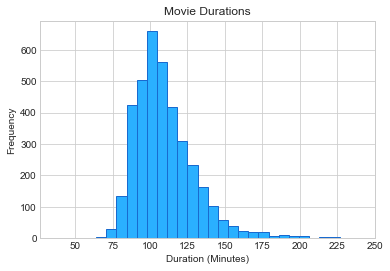

Almost all movies included in this data are in between 80 and 120 minutes long. The rightward skew points towards longer movies


In [2]:
df_shortfilms_large = df_im[df_im["duration"] <= 240]

df_shortfilms = df_shortfilms_large["duration"]

shortfilms = df_shortfilms.tolist()

plt.style.use('seaborn-whitegrid')
plt.hist(shortfilms, bins=30,facecolor="#2ab0ff" ,edgecolor='#196acf')

plt.title("Movie Durations")

plt.xlabel('Duration (Minutes)')
plt.ylabel("Frequency")

plt.show()


print("Almost all movies included in this data are in between 80 and 120 minutes long. The rightward skew points towards longer movies")


## Q2. (1.2%) Side-by-side box plot.
### Generate a side-by-side box plot to show the distribution of the number of critic reviews on four rating categories: PG-13, PG, G, and R. What insights can you get from the plot?

In [3]:
##TODO


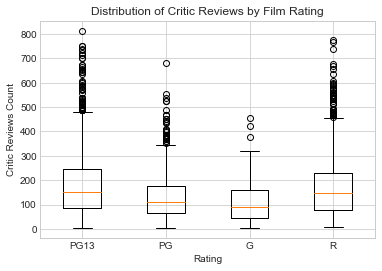

Insights:	 Among all ratings, most movies earn 200 reviews or less. Each rating has roughly the same shape distribution with a rightward skew. G Rated movies have a smaller range for critic review counts, capping at just over 400. 


In [4]:
df_Grated = df_im[df_im["content_rating"] == "G"]
df_PGrated = df_im[df_im["content_rating"] == "PG"]
df_pg13rated = df_im[df_im["content_rating"] == "PG-13"]
df_Rrated = df_im[df_im["content_rating"] == "R"]

df_gCritics = df_Grated["num_critic_for_reviews"]
df_pgCritics = df_PGrated["num_critic_for_reviews"]
df_pg13Critics = df_pg13rated["num_critic_for_reviews"]
df_rCritics = df_Rrated["num_critic_for_reviews"]

ratingData = {} #hashmap to hold all box plots


pg13Critics = df_pg13Critics.tolist()
ratingData["PG13"]=pg13Critics

pgCritics  = df_pgCritics.tolist()
ratingData["PG"]=pgCritics



gCritics = df_gCritics.tolist()
ratingData["G"]=gCritics



rCritics = df_rCritics.tolist()
ratingData["R"]=rCritics

fig,ax = plt.subplots()

ax.boxplot(ratingData.values())
ax.set_xticklabels(ratingData.keys())


plt.xlabel('Rating')
plt.ylabel("Critic Reviews Count")
plt.title("Distribution of Critic Reviews by Film Rating")

plt.show()



##TODO change to boxplots
insights = 'Among all ratings, most movies earn 200 reviews or less. Each rating has roughly the same shape distribution with a rightward skew. G Rated movies have a smaller range for critic review counts, capping at just over 400. '
print('Insights:\t', insights)

## Q3. (1.2%) QQ plot.
### We want to specifically compare the distribution of the number of critic reviews on two rating categories: R and PG-13. Generate a QQ plot and make comparisons on the two distributions from the plot. What insights can you get from the plot?

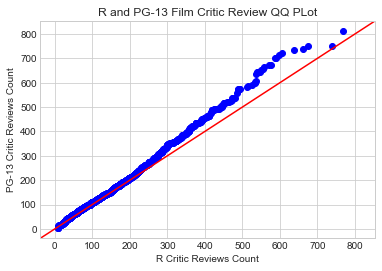

In [5]:
#pp_r = sm.ProbPlot(rCritics)
#pp_13 = sm.ProbPlot(pg13Critics)


qqplot_2samples(np.array(rCritics),np.array(pg13Critics),line='45') #probably has relationship if followes 45 deg line




plt.title("R and PG-13 Film Critic Review QQ PLot")
plt.ylabel("PG-13 Critic Reviews Count")
plt.xlabel("R Critic Reviews Count")



plt.show()
##TODO



In [6]:
##TODO
insights = 'your insights'
print('Insights:\t', insights)

Insights:	 your insights


## Q4. (1.2%) Scatter plot.
### Now we pay our attention to movies that are rated as 'G'.  Generate a scatter plot on the number of critic reviews and the number of user reviews. Use colors to show the IMDb scores. What insights can you get from the plot?


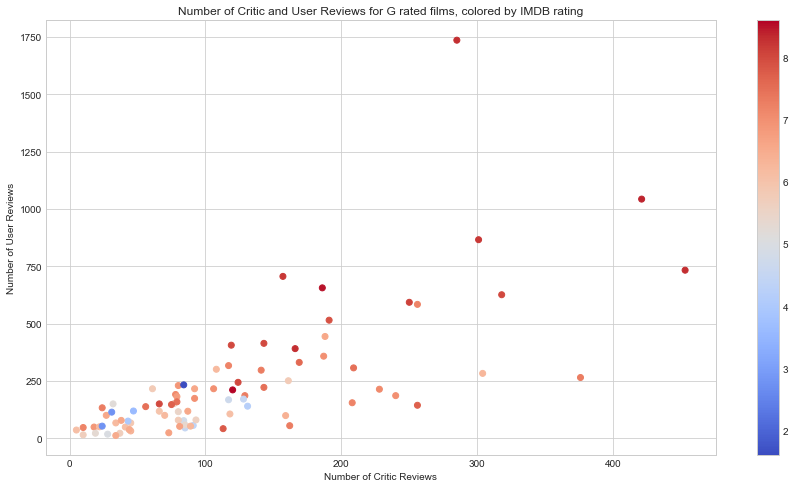

In [7]:
gCritics


df_gUser = df_Grated["num_user_for_reviews"]
gUsers = df_gUser.tolist()

plt.figure(figsize=(15,8))

plt.scatter(gCritics,gUsers,marker = 'o',c=[i for i in df_im[df_im['content_rating']=='G']['imdb_score']], cmap='coolwarm')
plt.xlabel("Number of Critic Reviews")
plt.ylabel("Number of User Reviews")
plt.title("Number of Critic and User Reviews for G rated films, colored by IMDB rating")


plt.colorbar()
##TODO

In [8]:
##TODO 
insights = 'your insights'
print('Insights:\t', insights)

Insights:	 your insights


## Q5. (1.4%) Star plot.
### We want to compare the number of Facebook likes for the following eight countries: Australia, Canada, France, Germany, India, Spain, UK, and USA. 
### Specifically, we want to draw three curves, each representing one of the following values for all countries: mean of movie_facebook_likes,mean of actor_1_facebook_likes, mean of director_facebook_likes
### Generate a star plot that shows the above information. Each of the equiangular spokes should represent one country.

Hint1: Read https://www.kite.com/python/examples/5561/matplotlib-plot-a-polar-plot 

Hint2: the theta value is in the radian unit, so you might find https://docs.python.org/3/library/math.html#math.radians  useful.

/Library/Python/3.7/site-packages/ipykernel_launcher.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator


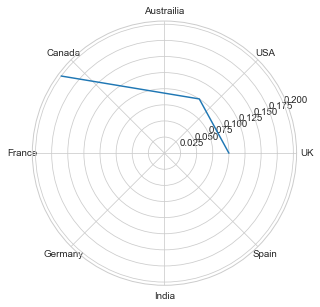

<Figure size 432x288 with 0 Axes>

In [9]:
##TODO
def facebookGrabber(nationdf):
    movieLikes = nationdf["movie_facebook_likes"].mean()
    actorLikes = nationdf["actor_1_facebook_likes"].mean()
    directorLikes = nationdf["director_facebook_likes"].mean()
    
    return movieLikes,actorLikes,directorLikes
    



#country dfs

df_ausFilms = df_im[df_im["country"] == "Austrailia"]
df_frFilms = df_im[df_im["country"] == "France"]
df_gerFilms = df_im[df_im["country"] == "Germany"]
df_indFilms = df_im[df_im["country"] == "India"]
df_spFilms = df_im[df_im["country"] == "Spain"]
df_ukFilms = df_im[df_im["country"] == "UK"]
df_usaFilms = df_im[df_im["country"] == "USA"]




##plotting
w = 6
h = 5
d = 70
plt.figure(figsize=(w, h), dpi=d)
theta = [0, 1, 2.5]
r = [0.1, 0.1, 0.2]
ax = plt.subplot(111, projection='polar')
ax.set_xticklabels(["UK","USA","Austrailia","Canada","France","Germany","India","Spain"])
ax.plot(theta, r)
plt.show()
plt.savefig("out.png")



In [10]:
##TODO 
insights = 'your insights'
print('Insights:\t', insights)

Insights:	 your insights
